In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100,1) -3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)

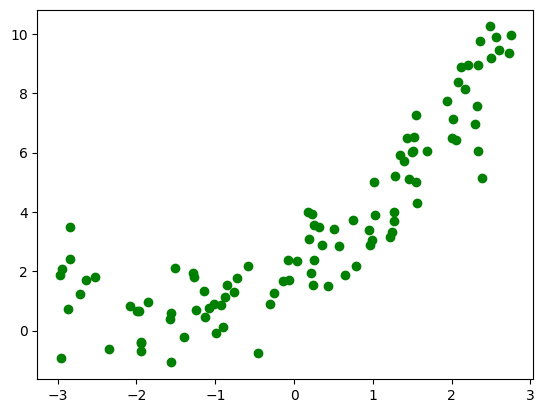

In [4]:
_=plt.scatter(X,y,c='g')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
## Lets implement Simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [9]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

0.45398214015308447


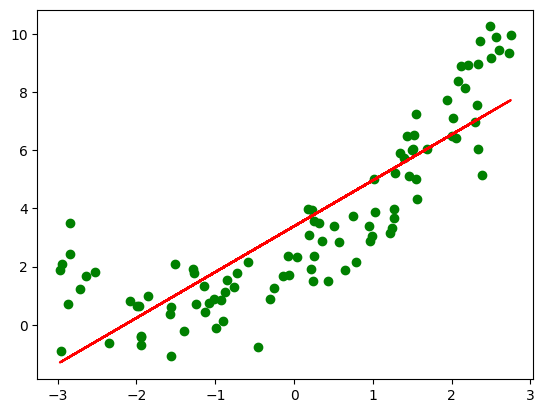

In [13]:
plt.scatter(X,y,c='g')
_=plt.plot(X,regression_1.predict(X),c='r')

In [14]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2,include_bias=True) # Incllude bias means we are going to multiply with 1

In [16]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
X_train_poly

array([[ 1.00000000e+00,  2.57236612e-01,  6.61706748e-02],
       [ 1.00000000e+00, -9.32463765e-01,  8.69488673e-01],
       [ 1.00000000e+00, -1.27367246e+00,  1.62224154e+00],
       [ 1.00000000e+00,  2.00609110e+00,  4.02440150e+00],
       [ 1.00000000e+00, -2.64620654e+00,  7.00240904e+00],
       [ 1.00000000e+00,  2.59517273e+00,  6.73492148e+00],
       [ 1.00000000e+00,  2.36006943e-01,  5.56992772e-02],
       [ 1.00000000e+00, -1.24306942e+00,  1.54522159e+00],
       [ 1.00000000e+00,  1.52364632e+00,  2.32149810e+00],
       [ 1.00000000e+00, -7.20596857e-01,  5.19259830e-01],
       [ 1.00000000e+00,  1.34339737e+00,  1.80471648e+00],
       [ 1.00000000e+00, -3.03903484e-01,  9.23573274e-02],
       [ 1.00000000e+00, -1.93767950e+00,  3.75460183e+00],
       [ 1.00000000e+00,  2.56482800e+00,  6.57834269e+00],
       [ 1.00000000e+00,  2.13954557e-01,  4.57765526e-02],
       [ 1.00000000e+00,  2.75033367e+00,  7.56433531e+00],
       [ 1.00000000e+00,  1.50703734e+00

In [18]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.7647670319995697


In [20]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.57503007 0.49720619]]
[1.92101724]


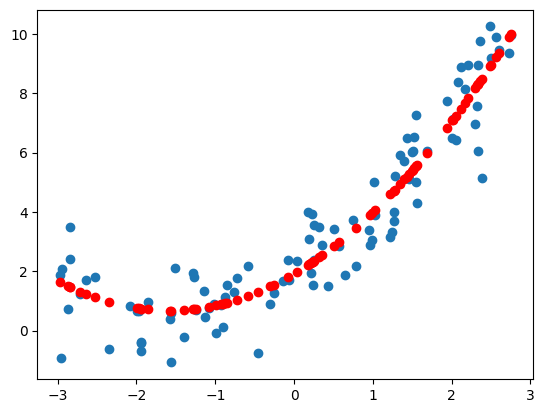

In [26]:
plt.scatter(X,y)
_=plt.scatter(X_train,regression.predict(X_train_poly),c='r')


In [28]:
poly = PolynomialFeatures(degree=3,include_bias=True) # Incllude bias means we are going to multiply with 1
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [29]:
regression3 = LinearRegression()
regression3.fit(X_train_poly,y_train)
y_pred = regression3.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.7312684303436228


**Here the degree 2 gave more accuracy than the degree 3**

In [30]:
poly = PolynomialFeatures(degree=2,include_bias=True) # Incllude bias means we are going to multiply with 1

In [33]:
## Preediction of new data
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)

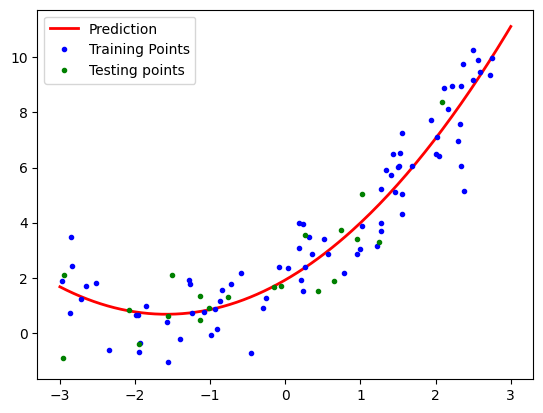

In [42]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,'r-',linewidth=2,label="Prediction")
plt.plot(X_train,y_train,'b.',label='Training Points')
plt.plot(X_test,y_test,'g.',label='Testing points')
plt.legend()

### Pipeline Concepts

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression=Pipeline([
        ('poly_features',poly_features),
        ("lin_reg",lin_reg)
    ])

    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)
    #Plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label='Degree '+str(degree),linewidth=2)
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])


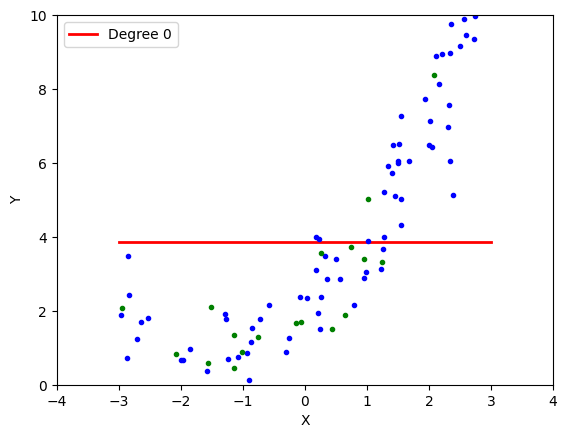

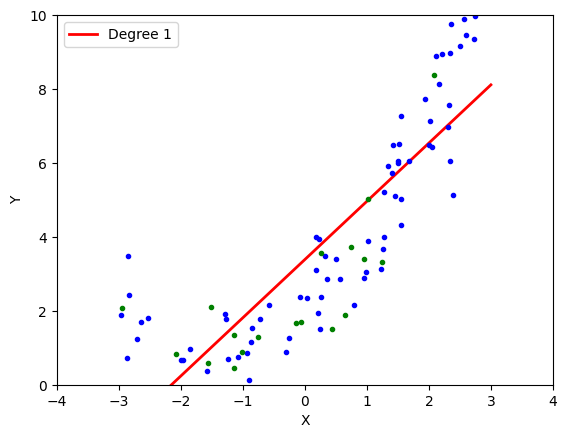

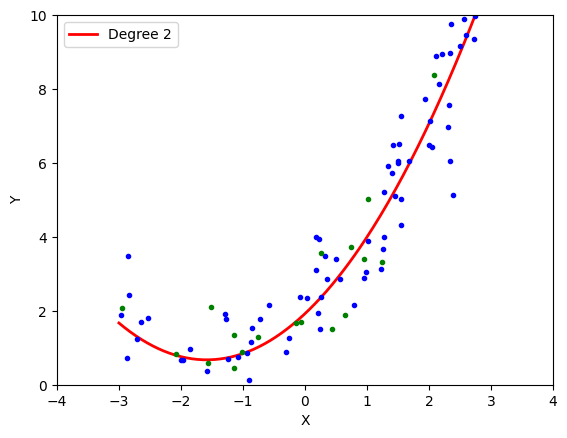

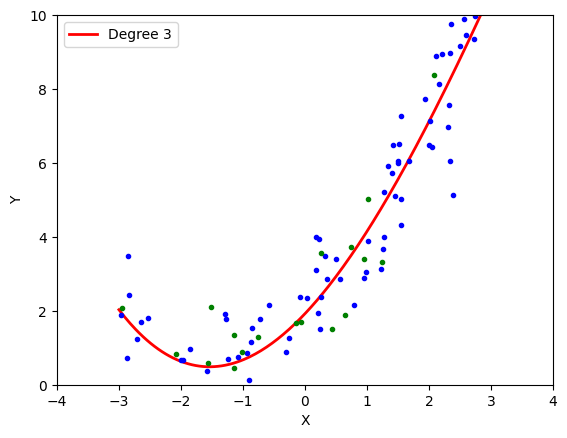

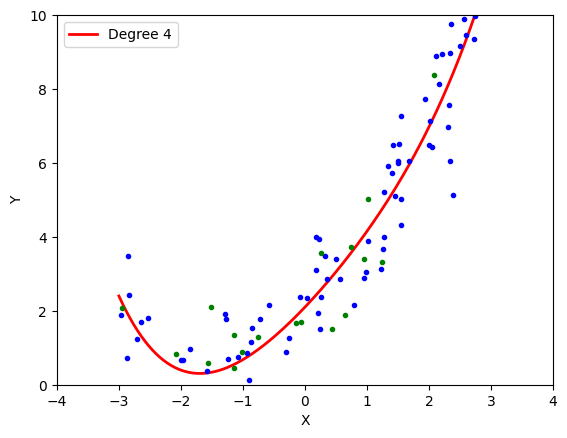

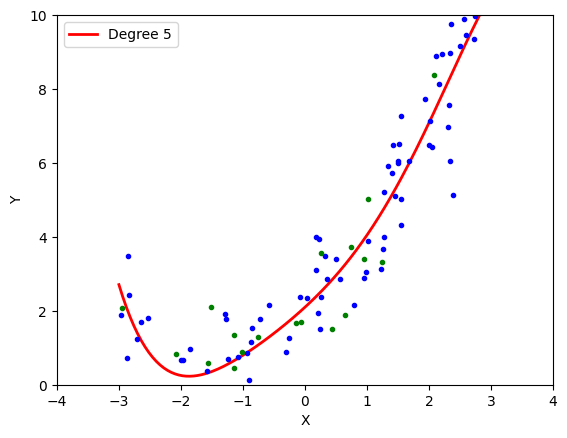

In [45]:
for i in range(6):
    plt.subplots()
    poly_regression(i)

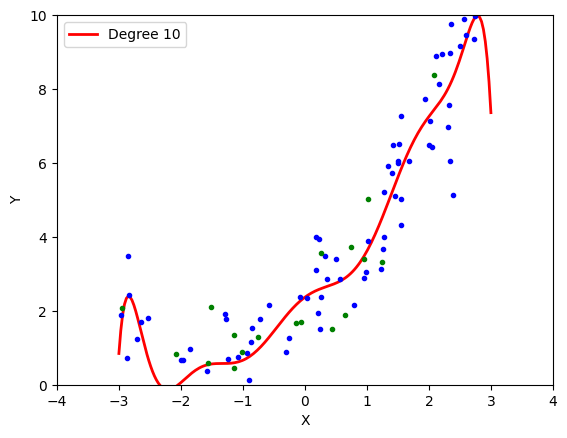

In [47]:
poly_regression(10)

**If we increase the degree the model tries to overfit the train data points..,  It's our responsibility to check the better degree**